<a href="https://colab.research.google.com/github/ABHIjithGT/Academic-Programs-Semester-based/blob/main/s3/Data%20Science/Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving Breast_Cancer.csv to Breast_Cancer.csv


01
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
02


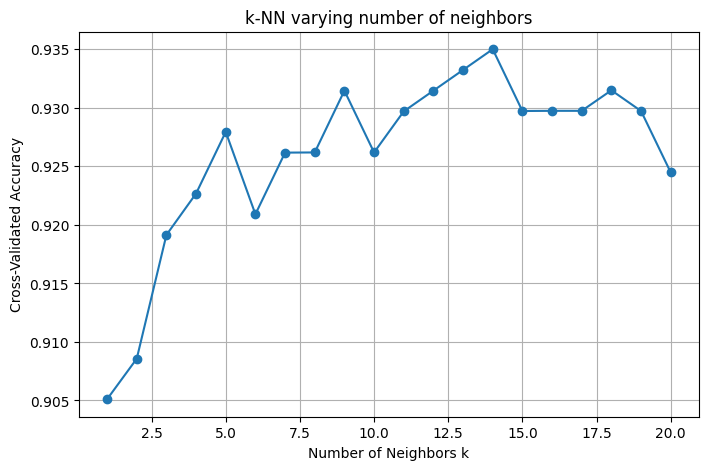

Optimal k found: 14 with accuracy 0.9350
03
Accuracy without scaling: 0.9736842105263158
Confusion Matrix (No Scaling):
[[71  0]
 [ 3 40]]
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        71
   Malignant       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

04
Accuracy with scaling: 0.956140350877193
Confusion Matrix (With Scaling):
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

05

Training with feature group: radius_features
Accuracy with radius_features: 0.9561

Training with feature g

In [ ]:


# 1. Load dataset
print("01")
df = pd.read_csv('Breast_Cancer.csv')  # Make sure to have the CSV file locally or change path accordingly

# Inspect columns
print(df.columns)

# Drop 'id' and 'Unnamed: 32' if present
df.drop(['id'], axis=1, inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(['Unnamed: 32'], axis=1, inplace=True)

# Encode diagnosis (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2. Find optimal k using cross-validation
print("02")
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs k
plt.figure(figsize=(8,5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN varying number of neighbors')
plt.grid(True)
plt.show()

optimal_k = k_range[np.argmax(cv_scores)]
print(f'Optimal k found: {optimal_k} with accuracy {max(cv_scores):.4f}')

# 3. Split data (80-20)
print("03")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train with optimal k (before scaling)
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy without scaling:", accuracy_score(y_test, y_pred))

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (No Scaling):")
print(cm)
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# 4. Feature Scaling
print("04")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=optimal_k)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

cm_scaled = confusion_matrix(y_test, y_pred_scaled)
print("Confusion Matrix (With Scaling):")
print(cm_scaled)
print(classification_report(y_test, y_pred_scaled, target_names=['Benign', 'Malignant']))

# 5. Feature subsets impact
print("05")

feature_groups = {
    'radius_features': [col for col in X.columns if 'radius' in col],
    'texture_features': [col for col in X.columns if 'texture' in col],
    'smoothness_features': [col for col in X.columns if 'smoothness' in col]
}

for group_name, features in feature_groups.items():
    print(f'\nTraining with feature group: {group_name}')
    X_train_sub = X_train[features]
    X_test_sub = X_test[features]
    scaler_sub = StandardScaler()
    X_train_sub_scaled = scaler_sub.fit_transform(X_train_sub)
    X_test_sub_scaled = scaler_sub.transform(X_test_sub)

    knn_sub = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_sub.fit(X_train_sub_scaled, y_train)
    y_pred_sub = knn_sub.predict(X_test_sub_scaled)

    acc = accuracy_score(y_test, y_pred_sub)
    print(f'Accuracy with {group_name}: {acc:.4f}')

# 6. Effect of train-test split ratio
print("06")

ratios = [0.4, 0.2]  # 60-40 and 80-20 splits
for test_ratio in ratios:
    print(f'\nTrain-Test split ratio: {1-test_ratio:.0%} train / {test_ratio:.0%} test')
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=test_ratio, random_state=42)

    scaler_r = StandardScaler()
    X_train_r_scaled = scaler_r.fit_transform(X_train_r)
    X_test_r_scaled = scaler_r.transform(X_test_r)

    knn_r = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_r.fit(X_train_r_scaled, y_train_r)
    y_pred_r = knn_r.predict(X_test_r_scaled)

    acc_r = accuracy_score(y_test_r, y_pred_r)
    print(f'Accuracy: {acc_r:.4f}')
